In [1]:
import os, sys

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import geopandas as gpd
from wordcloud import WordCloud

from utils import read_process_data

TRAIN_DATA_PATH = "data/train.csv"
TEST_DATA_PATH = "data/test.csv"


train_data = read_process_data(TRAIN_DATA_PATH)
test_data = read_process_data(TEST_DATA_PATH)

In [2]:
train_data.head()

,text_id,text,selected_text,sentiment,time_of_tweet,age_of_user,country,population,land_area,density
0,cb774db0d1,"I`d have responded, if I were going","I`d have responded, if I were going",neutral,morning,0-20,Afghanistan,38928346,652860.0,60
1,549e992a42,Sooo SAD I will miss you here in San Diego!!!,Sooo SAD,negative,noon,21-30,Albania,2877797,27400.0,105
2,088c60f138,my boss is bullying me...,bullying me,negative,night,31-45,Algeria,43851044,2381740.0,18
3,9642c003ef,what interview! leave me alone,leave me alone,negative,morning,46-60,Andorra,77265,470.0,164
4,358bd9e861,"Sons of ****, why couldn`t they put them on t...","Sons of ****,",negative,noon,60-70,Angola,32866272,1246700.0,26


In [3]:
test_data.head()

,text_id,text,sentiment,time_of_tweet,age_of_user,country,population,land_area,density
0,f87dea47db,Last session of the day http://twitpic.com/67ezh,neutral,morning,0-20,Afghanistan,38928346.0,652860.0,60.0
1,96d74cb729,Shanghai is also really exciting (precisely -...,positive,noon,21-30,Albania,2877797.0,27400.0,105.0
2,eee518ae67,"Recession hit Veronique Branquinho, she has to...",negative,night,31-45,Algeria,43851044.0,2381740.0,18.0
3,01082688c6,happy bday!,positive,morning,46-60,Andorra,77265.0,470.0,164.0
4,33987a8ee5,http://twitpic.com/4w75p - I like it!!,positive,noon,60-70,Angola,32866272.0,1246700.0,26.0


##### Visualizing data types and missing values

In [4]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27481 entries, 0 to 27480
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   text_id        27481 non-null  object 
 1   text           27481 non-null  object 
 2   selected_text  27481 non-null  object 
 3   sentiment      27481 non-null  object 
 4   time_of_tweet  27481 non-null  object 
 5   age_of_user    27481 non-null  object 
 6   country        27481 non-null  object 
 7   population     27481 non-null  int64  
 8   land_area      27481 non-null  float64
 9   density        27481 non-null  int64  
dtypes: float64(1), int64(2), object(7)
memory usage: 2.1+ MB


In [5]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4815 entries, 0 to 4814
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   text_id        4815 non-null   object 
 1   text           4815 non-null   object 
 2   sentiment      3534 non-null   object 
 3   time_of_tweet  4815 non-null   object 
 4   age_of_user    4815 non-null   object 
 5   country        4815 non-null   object 
 6   population     3534 non-null   float64
 7   land_area      3534 non-null   float64
 8   density        3534 non-null   float64
dtypes: float64(3), object(6)
memory usage: 338.7+ KB


#### Distribution of posts grouped by sentiment

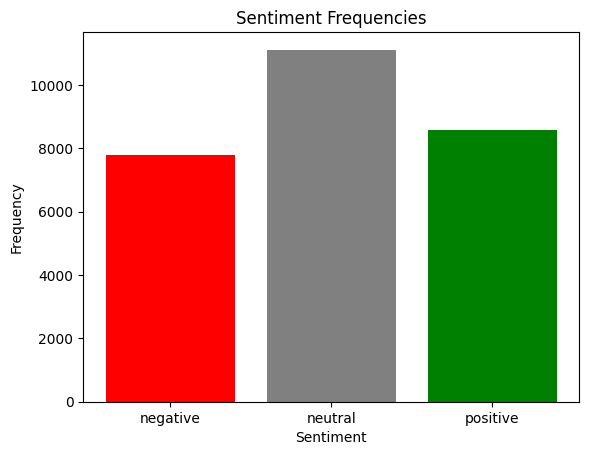

In [15]:
sentiment_frequencies = train_data.sentiment.value_counts().sort_index().to_dict()

sentiments = list(sentiment_frequencies.keys())
frequencies = list(sentiment_frequencies.values())

plt.bar(sentiments, frequencies, color=["red", "gray", "green"])
plt.xlabel("Sentiment")
plt.ylabel("Frequency")
plt.title("Sentiment Frequencies")
plt.show()

#### Visualizing word clouds for the 3 sentiments

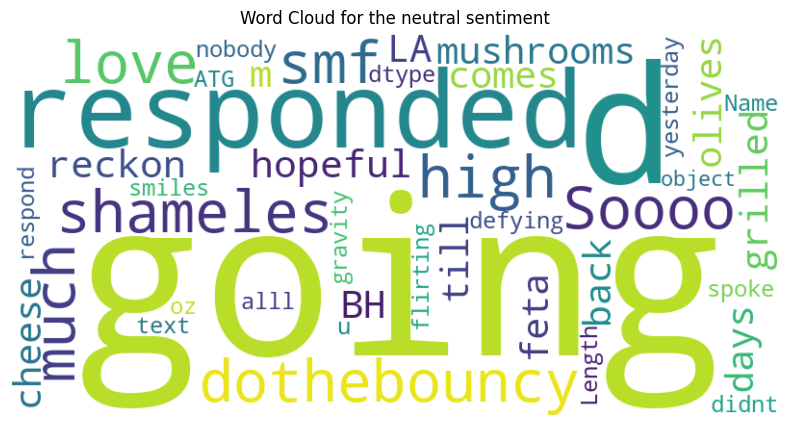

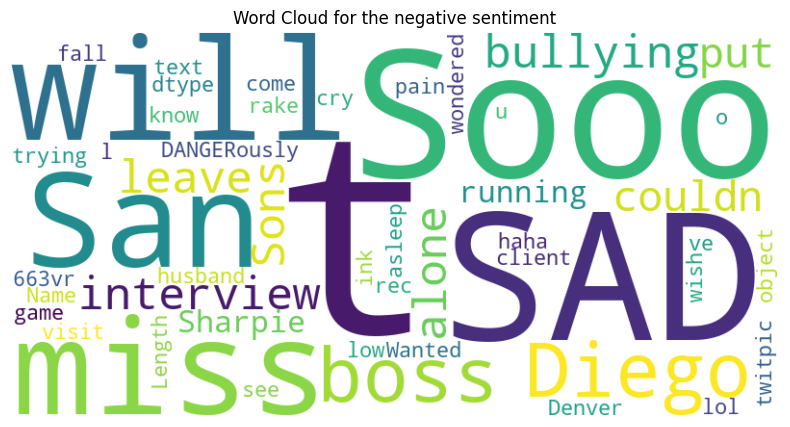

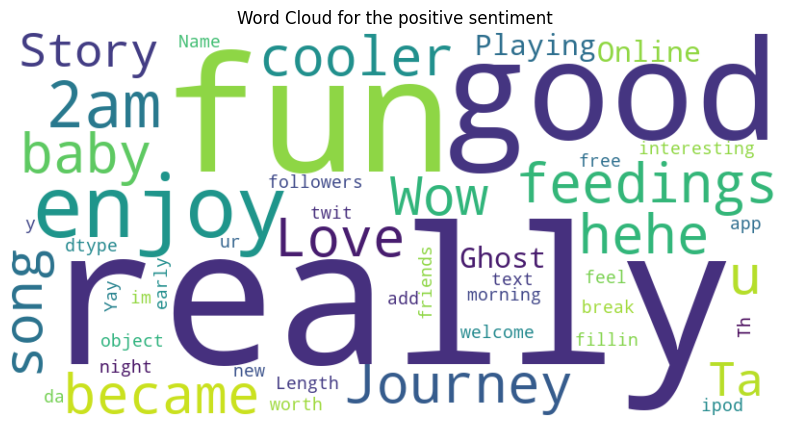

In [7]:
def generate_wordcloud(data, title):
    wordcloud = WordCloud(width=800, height=400, background_color="white").generate(str(data))
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation="bilinear")
    plt.axis("off")
    plt.title(title)
    plt.show()

# Unique sentiment values
sentiments = train_data["sentiment"].unique()

# Generate a word cloud for each sentiment
for sentiment in sentiments:
    sentiment_data = train_data[train_data["sentiment"] == sentiment]["text"]
    generate_wordcloud(sentiment_data, f"Word Cloud for the {sentiment} sentiment")

#### Visualizing where the data comes from

C:\Users\Luca\AppData\Local\Temp\ipykernel_8736\2627572723.py:5: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  world = gpd.read_file(gpd.datasets.get_path("naturalearth_lowres"))


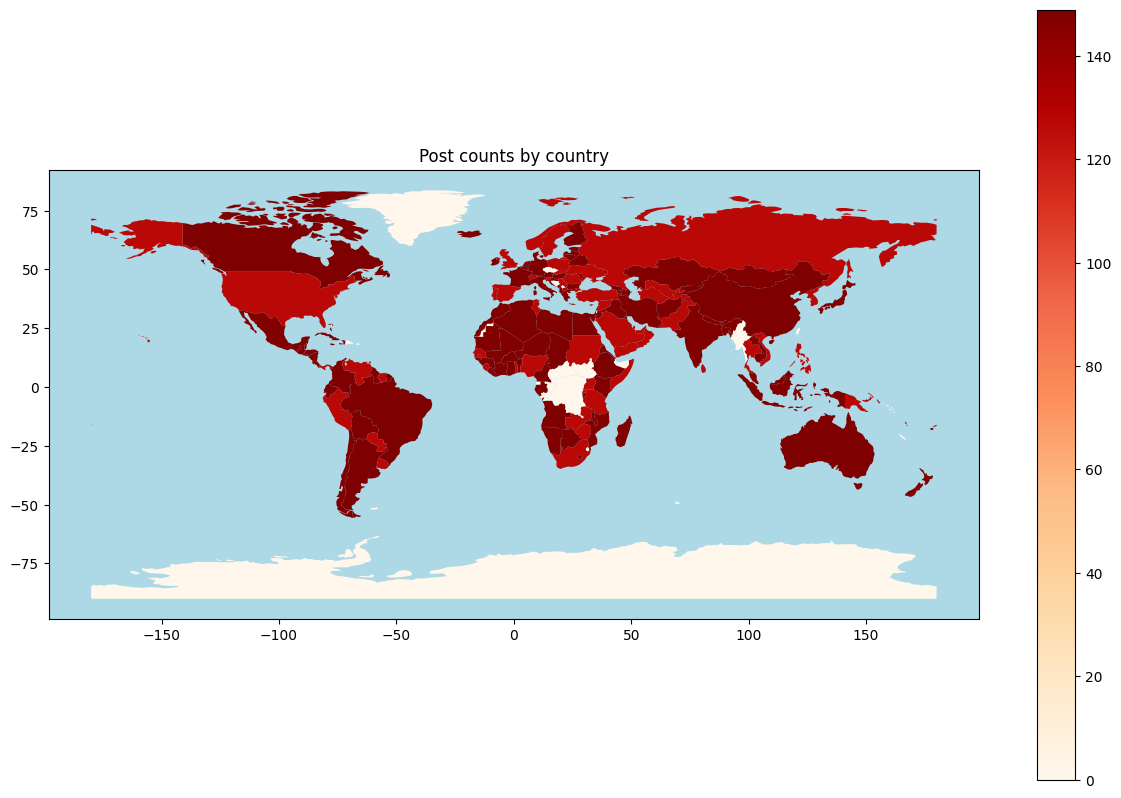

In [14]:
country_counts = train_data.country.value_counts().reset_index()

country_counts.columns = ["country", "count"]
# country_counts
world = gpd.read_file(gpd.datasets.get_path("naturalearth_lowres"))
world = world.merge(country_counts, left_on="name", right_on="country", how="left")
world["count"] = world["count"].fillna(0)


fig, ax = plt.subplots(1, 1, figsize=(15, 10))
ax.set_facecolor("lightblue")
world.plot(column="count", ax=ax, legend=True, cmap="OrRd")
plt.title("Post counts by country")
plt.show()